In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import random
import seaborn
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,save_model,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, BatchNormalization,Dropout
from tensorflow.keras.applications import MobileNetV2

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [70]:
data_dir =r"E:\1. Thesis\PDD_MangoLeaf\Dataset"
keyword= ['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']

In [76]:
    train_datagen=ImageDataGenerator(
        rescale=1/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    train_generator=train_datagen.flow_from_directory(
        'train',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
    )

Found 2400 images belonging to 8 classes.


In [77]:
    validation_datagen=ImageDataGenerator(rescale=1/255)
    validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical'
    )

Found 800 images belonging to 8 classes.


In [91]:
    test_datagen=ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

Found 800 images belonging to 8 classes.


In [79]:
class_names = sorted(train_generator.class_indices.items())
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
       'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould'],
      dtype='<U16')

In [80]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=True

In [81]:
num_classes=8
#inputs=base_model.input
inputs = tf.keras.Input(shape=(224,224,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,577,928 (13.65 MB)

 Trainable params: 3,543,816 (13.52 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [84]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 565s 7s/step - accuracy: 0.3263 - loss: 1.8528 - val_accuracy: 0.2887 - val_loss: 1.9229
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 457s 6s/step - accuracy: 0.8920 - loss: 0.8033 - val_accuracy: 0.4512 - val_loss: 1.6158
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 437s 6s/step - accuracy: 0.9615 - loss: 0.3692 - val_accuracy: 0.5337 - val_loss: 1.4392
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 935s 13s/step - accuracy: 0.9838 - loss: 0.1975 - val_accuracy: 0.5888 - val_loss: 1.3045
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 496s 6s/step - accuracy: 0.9856 - loss: 0.1311 - val_accuracy: 0.6175 - val_loss: 1.1801
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 464s 6s/step - accuracy: 0.9860 - loss: 0.1068 - val_accuracy: 0.6400 - val_loss: 1.0947
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 462s 6s/step - accuracy: 0.9891 - loss: 0.0766 - val_accuracy: 0.6400 - val_loss: 1.0455
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 475s 6s/step - accuracy: 0.9909 - loss: 0.0647 - val_accuracy: 0.6575 - 

In [92]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 964ms/step - accuracy: 0.7511 - loss: 0.6654
Test Loss: 0.780152440071106, Test Accuracy: 0.7462499737739563


In [93]:
predictions=model.predict(test_generator)
predicted_classes=np.argmax(predictions,axis=1)
ture_classes=test_generator.classes
class_labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
report=metrics.classification_report(ture_classes,predicted_classes,target_names=class_labels)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 938ms/step
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.72      0.84       100
Bacterial Canker       1.00      0.47      0.64       100
  Cutting Weevil       0.99      1.00      1.00       100
        Die Back       0.93      0.91      0.92       100
      Gall Midge       0.42      0.96      0.59       100
         Healthy       0.76      0.99      0.86       100
  Powdery Mildew       0.80      0.89      0.84       100
     Sooty Mould       0.23      0.03      0.05       100

        accuracy                           0.75       800
       macro avg       0.77      0.75      0.72       800
    weighted avg       0.77      0.75      0.72       800



In [96]:
test_predictions=model.predict(test_generator)
test_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 955ms/step


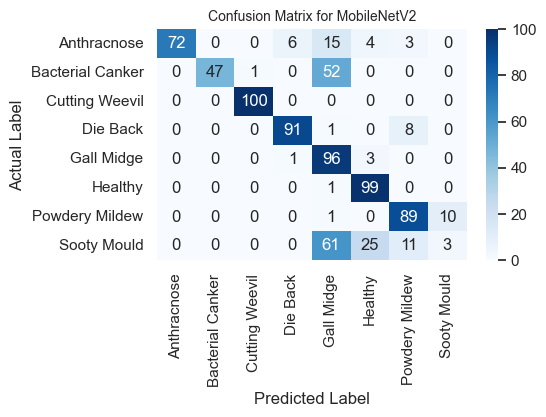

In [97]:
plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,test_predicted_labels)
#class_names=[label for label in np.unique(df['label'])]
class_names=class_names=list(test_generator.class_indices.keys())
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for MobileNetV2',fontsize=10)
plt.show()

In [98]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=False

In [99]:
num_classes=8
#inputs=base_model.input
inputs = tf.keras.Input(shape=(224,224,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.2164 - loss: 2.0824 - val_accuracy: 0.4675 - val_loss: 1.7054
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.7307 - loss: 1.3002 - val_accuracy: 0.6513 - val_loss: 1.3444
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8605 - loss: 0.8521 - val_accuracy: 0.7312 - val_loss: 1.1440
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9092 - loss: 0.6281 - val_accuracy: 0.7575 - val_loss: 1.0261
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9360 - loss: 0.4943 - val_accuracy: 0.7950 - val_loss: 0.9417
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9494 - loss: 0.3888 - val_accuracy: 0.8087 - val_loss: 0.8984
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9498 - loss: 0.3376 - val_accuracy: 0.8225 - val_loss: 0.8571
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9686 - loss: 0.2740 - val_accuracy: 0.8275 - v

In [101]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9316 - loss: 0.3767
Test Loss: 0.8132311105728149, Test Accuracy: 0.8349999785423279


In [102]:
predictions=model.predict(test_generator)
predicted_classes=np.argmax(predictions,axis=1)
ture_classes=test_generator.classes
class_labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
report=metrics.classification_report(ture_classes,predicted_classes,target_names=class_labels)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 975ms/step
                  precision    recall  f1-score   support

     Anthracnose       0.89      0.89      0.89       100
Bacterial Canker       1.00      0.97      0.98       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       0.98      0.95      0.96       100
      Gall Midge       0.60      0.97      0.74       100
         Healthy       0.73      0.98      0.83       100
  Powdery Mildew       0.88      0.91      0.89       100
     Sooty Mould       0.25      0.01      0.02       100

        accuracy                           0.83       800
       macro avg       0.79      0.83      0.79       800
    weighted avg       0.79      0.83      0.79       800



In [103]:
test_predictions=model.predict(test_generator)
test_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


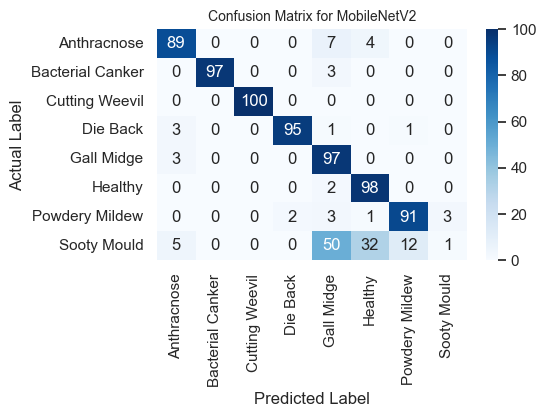

In [104]:
plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,test_predicted_labels)
#class_names=[label for label in np.unique(df['label'])]
class_names=class_names=list(test_generator.class_indices.keys())
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for MobileNetV2',fontsize=10)
plt.show()

In [108]:
    train_datagen=ImageDataGenerator(
        rescale=1/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    train_generator=train_datagen.flow_from_directory(
        'train',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
    )

Found 2400 images belonging to 8 classes.


In [115]:
    validation_datagen=ImageDataGenerator(rescale=1/255)
    validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical'
    )

Found 800 images belonging to 8 classes.


In [116]:
    test_datagen=ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

Found 800 images belonging to 8 classes.


In [117]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable=False

In [118]:
num_classes=8
#inputs=base_model.input
inputs = tf.keras.Input(shape=(128,128,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [119]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7571 - loss: 0.7830 - val_accuracy: 0.8112 - val_loss: 1.4176
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 615ms/step - accuracy: 0.9708 - loss: 0.0968 - val_accuracy: 0.8375 - val_loss: 0.8568
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 611ms/step - accuracy: 0.9786 - loss: 0.0745 - val_accuracy: 0.7525 - val_loss: 1.2750
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 608ms/step - accuracy: 0.9621 - loss: 0.1050 - val_accuracy: 0.8163 - val_loss: 0.9410
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 91s 728ms/step - accuracy: 0.9784 - loss: 0.0607 - val_accuracy: 0.8363 - val_loss: 1.2437
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 597ms/step - accuracy: 0.9823 - loss: 0.0407 - val_accuracy: 0.8512 - val_loss: 1.0269
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 790ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.8275 - val_loss: 1.1960
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 60s 794ms/step - accuracy: 0.9801 - loss: 0.0565 - val_accurac

In [120]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.8702 - loss: 0.5513
Test Loss: 1.2276116609573364, Test Accuracy: 0.8224999904632568


In [121]:
predictions=model.predict(test_generator)
predicted_classes=np.argmax(predictions,axis=1)
ture_classes=test_generator.classes
class_labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
report=metrics.classification_report(ture_classes,predicted_classes,target_names=class_labels)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.74      0.85       100
Bacterial Canker       1.00      0.97      0.98       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       1.00      0.82      0.90       100
      Gall Midge       0.66      1.00      0.79       100
         Healthy       0.67      0.98      0.80       100
  Powdery Mildew       0.72      0.98      0.83       100
     Sooty Mould       0.75      0.09      0.16       100

        accuracy                           0.82       800
       macro avg       0.85      0.82      0.79       800
    weighted avg       0.85      0.82      0.79       800



In [122]:
test_predictions=model.predict(test_generator)
test_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step


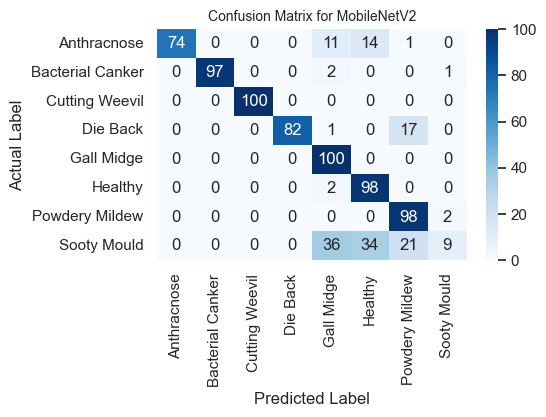

In [123]:
plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,test_predicted_labels)
#class_names=[label for label in np.unique(df['label'])]
class_names=class_names=list(test_generator.class_indices.keys())
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for MobileNetV2',fontsize=10)
plt.show()

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [172]:
trdata = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range=[0.7, 1.3],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    #fill_mode= 'nearest',

)
traindata = trdata.flow_from_directory('train',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,
                                    )
tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory('test',
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=False,
                                    )

Found 2400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [173]:
base_model = MobileNetV2(input_shape = (224,224,3), include_top = False, weights='imagenet')

In [174]:
base_model.trainable=False

In [175]:
model = keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(units=1024,activation='relu'),

                          #keras.layers.Dropout(0.5),
                          keras.layers.Dense(units=8,activation='softmax'),
])

In [177]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [178]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_12          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,577,928 (13.65 MB)

 Trainable params: 1,319,944 (5.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [179]:
hist = model.fit(
    traindata,
    #steps_per_epoch=50,
    epochs=10,
    validation_data=testdata,
    validation_steps=2,
    #callbacks = [learning_rate_reduction]
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.7678 - loss: 0.7279 - val_accuracy: 0.9375 - val_loss: 0.1630
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9726 - loss: 0.0831 - val_accuracy: 0.9219 - val_loss: 0.1837
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9867 - loss: 0.0399 - val_accuracy: 0.8906 - val_loss: 0.2505
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9758 - loss: 0.0685 - val_accuracy: 0.9844 - val_loss: 0.0454
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9852 - loss: 0.0379 - val_accuracy: 0.9531 - val_loss: 0.1232
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9801 - loss: 0.0585 - val_accuracy: 0.9844 - val_loss: 0.0243
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9939 - loss: 0.0172 - val_accuracy: 0.9062 - val_loss: 0.1505
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9922 - loss: 0.0275 - val_accuracy: 0.9844 - v

In [180]:
model.evaluate(traindata)
model.evaluate(testdata)

75/75 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9922 - loss: 0.0245
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 938ms/step - accuracy: 0.9777 - loss: 0.0743


[0.29566454887390137, 0.9100000262260437]

In [181]:
test_predictions=model.predict(testdata)
test_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 947ms/step


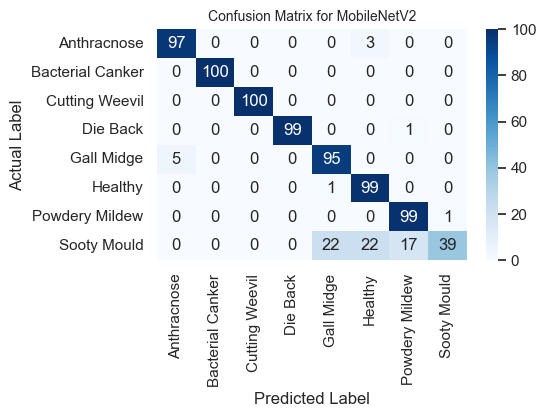

In [189]:
plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,test_predicted_labels)
#class_names=[label for label in np.unique(df['label'])]
class_names=class_names=list(testdata.class_indices.keys())
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for MobileNetV2',fontsize=10)
plt.show()

In [190]:
import collections
print(collections.Counter(testdata.classes))


Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100})


In [192]:
p = model.predict(testdata)
pred_classes = np.argmax(p, axis=1)
true_classes = testdata.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


<Axes: >

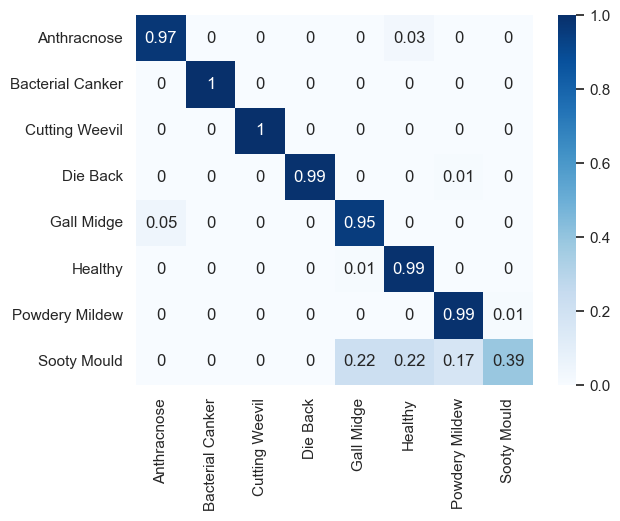

In [193]:
cm = confusion_matrix(true_classes,pred_classes)
cmn=cm/cm.astype(float).sum(axis=1)
labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
sns.heatmap(cmn,cmap= "Blues" , annot = True,xticklabels = labels,yticklabels = labels)

<Axes: >

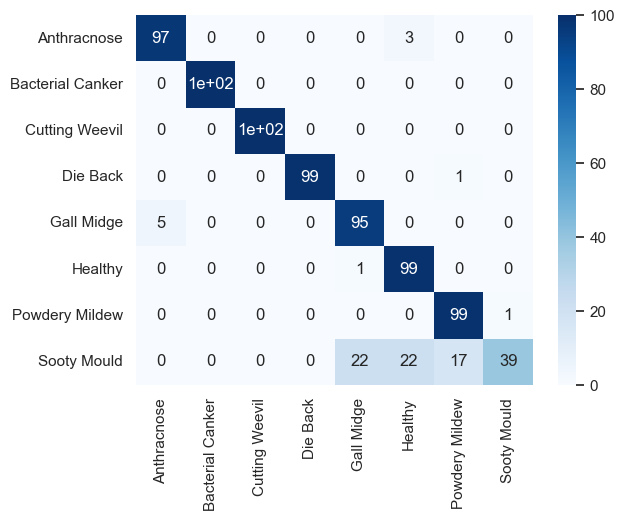

In [194]:
sns.heatmap(cm,cmap= "Blues" , annot = True,xticklabels = labels,yticklabels = labels)

In [195]:
print(classification_report(true_classes,pred_classes, target_names = ['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']))

                  precision    recall  f1-score   support

     Anthracnose       0.95      0.97      0.96       100
Bacterial Canker       1.00      1.00      1.00       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       1.00      0.99      0.99       100
      Gall Midge       0.81      0.95      0.87       100
         Healthy       0.80      0.99      0.88       100
  Powdery Mildew       0.85      0.99      0.91       100
     Sooty Mould       0.97      0.39      0.56       100

        accuracy                           0.91       800
       macro avg       0.92      0.91      0.90       800
    weighted avg       0.92      0.91      0.90       800

